In [59]:
%matplotlib inline
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
plt.style.use('ggplot')
#import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
import os

In [60]:
import plotly.figure_factory as ff


In [61]:
import scipy.stats as stats

In [62]:
import plotly
plotly.offline.init_notebook_mode(connected=True)
import plotly.graph_objs as go

In [63]:
df = pd.read_csv('..\ExploratoryDataAnalysis\google-play-store-apps\googleplaystore.csv')



In [64]:
df.drop_duplicates(subset='App', inplace=True)
df = df[df['Android Ver'] != np.nan]
df = df[df['Android Ver'] != 'NaN']
df = df[df['Installs'] != 'Free']
df = df[df['Installs'] != 'Paid']

In [66]:
df.head(2)

App        Category  Rating  \
0  Photo Editor & Candy Camera & Grid & ScrapBook  ART_AND_DESIGN     4.1   
1                             Coloring book moana  ART_AND_DESIGN     3.9   

  Reviews Size  Installs  Type Price Content Rating  \
0     159  19M   10,000+  Free     0       Everyone   
1     967  14M  500,000+  Free     0       Everyone   

                      Genres      Last Updated Current Ver   Android Ver  
0               Art & Design   January 7, 2018       1.0.0  4.0.3 and up  
1  Art & Design;Pretend Play  January 15, 2018       2.0.0  4.0.3 and up

##### Data Cleaning
1. Remove '+' from 'Number of Installs'
2. Convert app size to MB
3. Remove 'NaN'
4. Remove '$' from 'Price'
5. Convert 'String' to 'int' or 'float'

In [67]:
df['Installs'] = df['Installs'].apply(lambda x: x.replace('+', '') if '+' in x else x)
df['Installs'] = df['Installs'].apply(lambda x: x.replace(',', '') if ',' in x else x)
df['Installs'] = df['Installs'].apply(lambda x: int(x))



In [68]:
df['Size'] = df['Size'].apply(lambda x: str(x).replace('Varies with device', 'NaN') 
                              if "Varies with device" in str(x) else x)
df["Size"] = df["Size"].apply(lambda x: str(x).replace('M','') 
                              if 'M' in str(x) else x)
df["Size"] = df["Size"].apply(lambda x: str(x).replace(',','') 
                              if ',' in str(x) else x)
df['Size'] = df['Size'].apply(lambda x: str(x).replace('+', '') 
                              if '+' in str(x) else x)
df["Size"] = df["Size"].apply(lambda x: float(str(x).replace('k','') )/1024
                              if 'k' in str(x) else x)

df['Price'] = df['Price'].apply(lambda x: x.replace('$', '') if '$' in str(x) else x)

df['Price'] = df['Price'].apply(lambda x: float(x))


In [69]:
df['Reviews'] = df['Reviews'].apply(lambda x: int(x) )

In [70]:
df.head(4)

App        Category  Rating  \
0     Photo Editor & Candy Camera & Grid & ScrapBook  ART_AND_DESIGN     4.1   
1                                Coloring book moana  ART_AND_DESIGN     3.9   
2  U Launcher Lite – FREE Live Cool Themes, Hide ...  ART_AND_DESIGN     4.7   
3                              Sketch - Draw & Paint  ART_AND_DESIGN     4.5   

   Reviews Size  Installs  Type  Price Content Rating  \
0      159   19     10000  Free    0.0       Everyone   
1      967   14    500000  Free    0.0       Everyone   
2    87510  8.7   5000000  Free    0.0       Everyone   
3   215644   25  50000000  Free    0.0           Teen   

                      Genres      Last Updated         Current Ver  \
0               Art & Design   January 7, 2018               1.0.0   
1  Art & Design;Pretend Play  January 15, 2018               2.0.0   
2               Art & Design    August 1, 2018               1.2.4   
3               Art & Design      June 8, 2018  Varies with device   

    Android Ver  
0  4.0.3 and up  
1  4.0.3 and up  
2  4.0.3 and up  
3    4.2 and up

In [71]:
df.describe().head(6)

Rating       Reviews      Installs        Price
count  8196.000000  9.659000e+03  9.659000e+03  9659.000000
mean      4.173243  2.165926e+05  7.777507e+06     1.099299
std       0.536625  1.831320e+06  5.375828e+07    16.852152
min       1.000000  0.000000e+00  0.000000e+00     0.000000
25%       4.000000  2.500000e+01  1.000000e+03     0.000000
50%       4.300000  9.670000e+02  1.000000e+05     0.000000

### Market Share of Different App Categories

In [72]:
categorycount = df['Category'].value_counts().sort_values(ascending = True)

categorydata = [go.Pie(labels = categorycount.index,values = categorycount.values,hoverinfo = 'label+value')]

plotly.offline.iplot(categorydata, filename='active_category')

### Distribution of Downloads

Text(0, 0.5, 'Frequency')

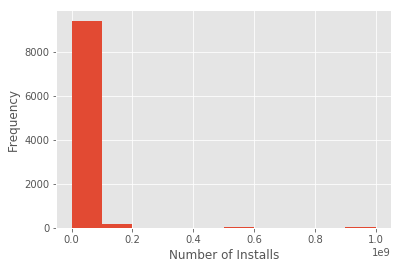

In [73]:
df.Installs.hist()
plt.xlabel('Number of Installs')
plt.ylabel('Frequency')


In [74]:
df.groupby('Type').describe()

Rating                                              Reviews  \
       count      mean       std  min  25%  50%  75%  max   count   
Type                                                                
Free  7592.0  4.166372  0.534163  1.0  4.0  4.3  4.5  5.0  8902.0   
Paid   604.0  4.259603  0.559961  1.0  4.1  4.4  4.6  5.0   756.0   

                     ...   Installs                 Price             \
               mean  ...        75%           max   count       mean   
Type                 ...                                               
Free  234270.002134  ...  1000000.0  1.000000e+09  8902.0   0.000000   
Paid    8724.887566  ...    10000.0  1.000000e+07   756.0  14.045146   

                                                
            std   min   25%   50%   75%    max  
Type                                            
Free   0.000000  0.00  0.00  0.00  0.00    0.0  
Paid  58.743615  0.99  1.49  2.99  4.99  400.0  

[2 rows x 32 columns]

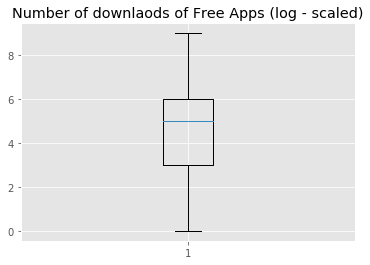

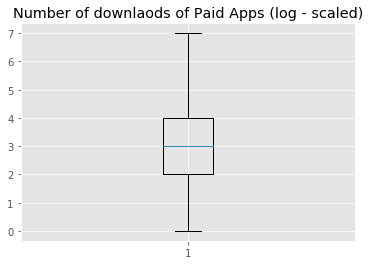

In [75]:
y = np.log10(df['Installs'][df.Type=='Free']) 
x = np.log10(df['Installs'][df.Type=='Paid']) 

plt.boxplot(y) 
plt.title("Number of downlaods of Free Apps (log - scaled)")
plt.show()
plt.boxplot(x) 
plt.title("Number of downlaods of Paid Apps (log - scaled)")
plt.show()

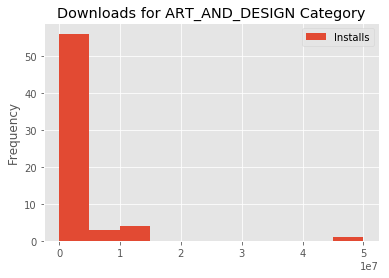

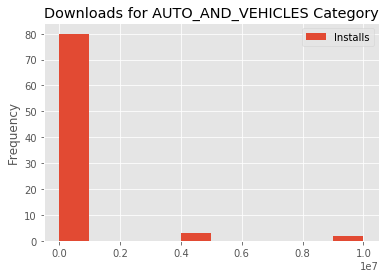

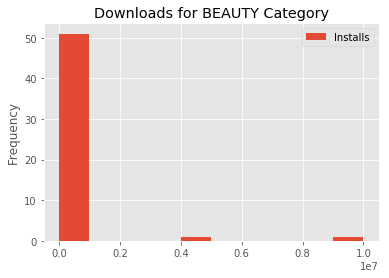

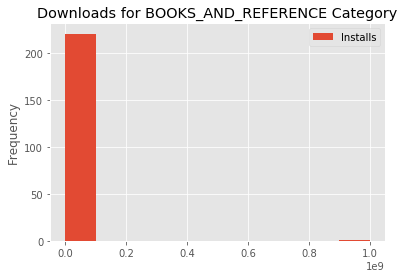

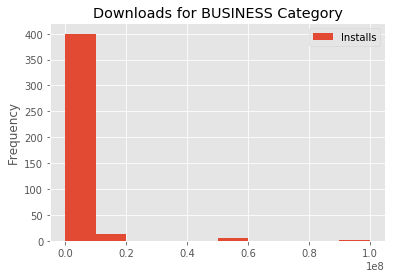

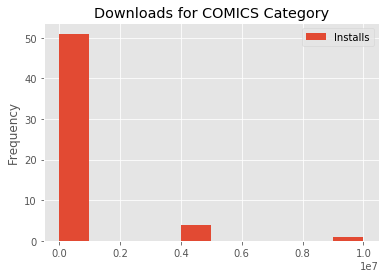

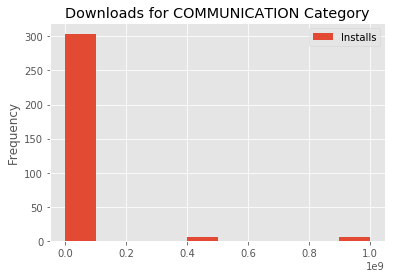

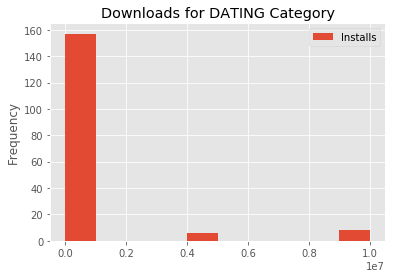

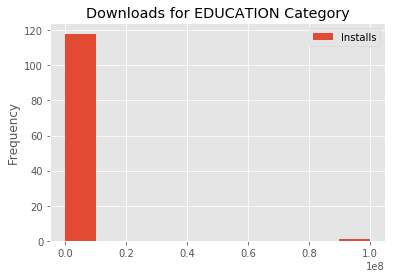

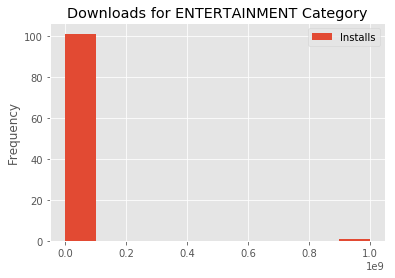

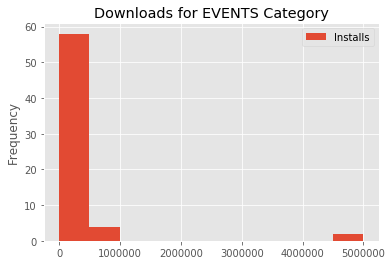

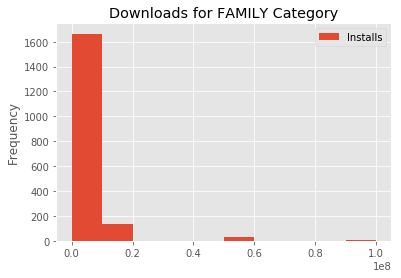

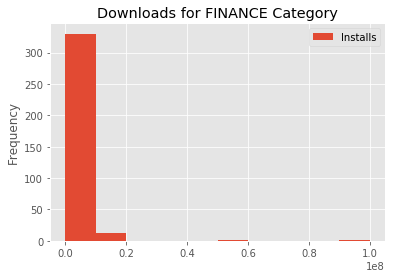

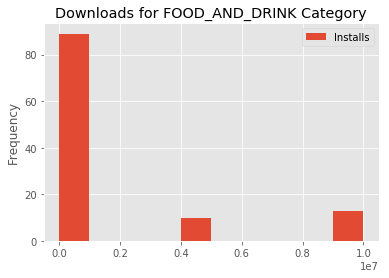

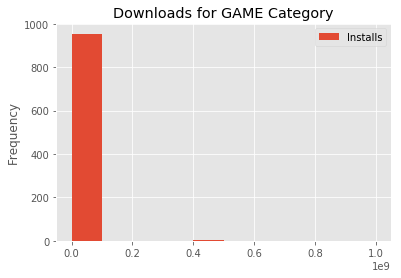

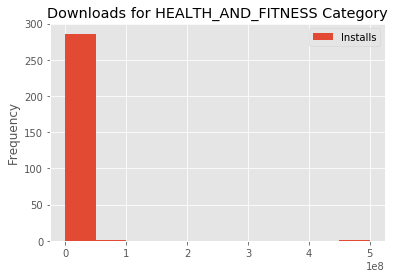

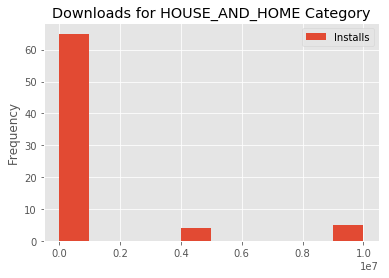

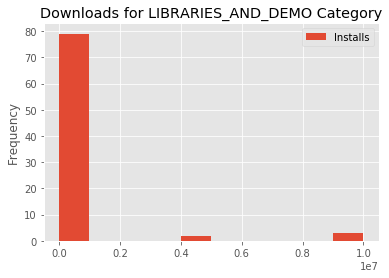

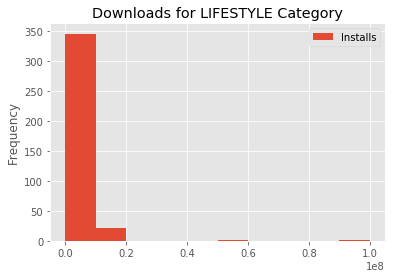

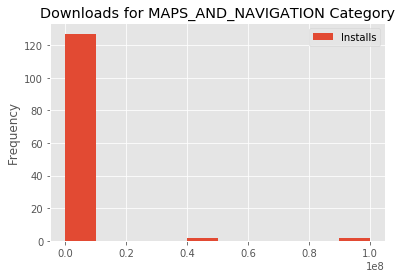

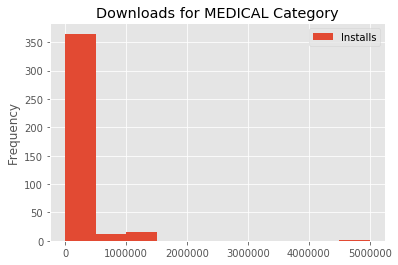

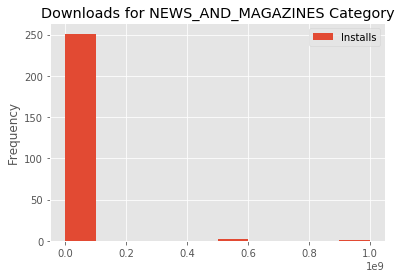

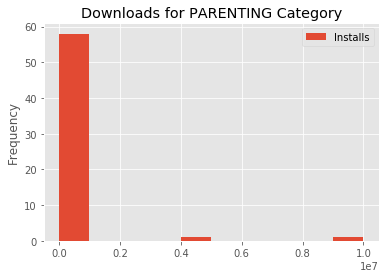

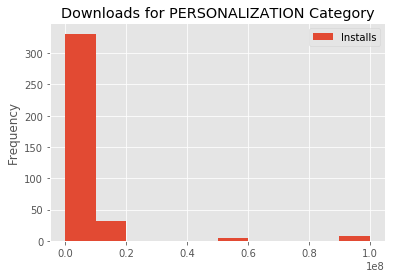

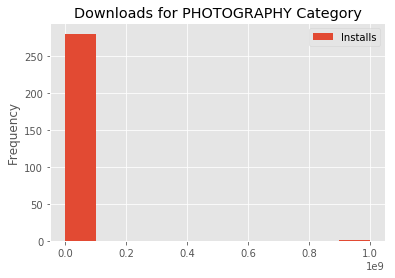

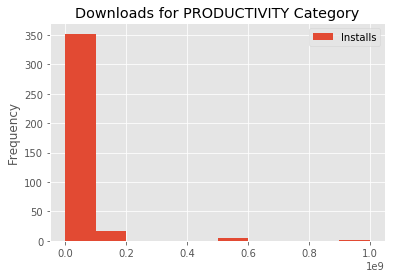

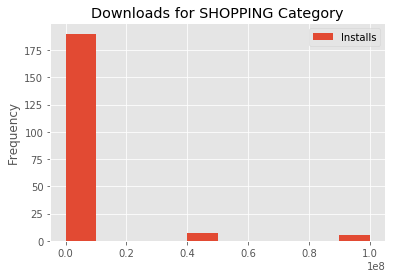

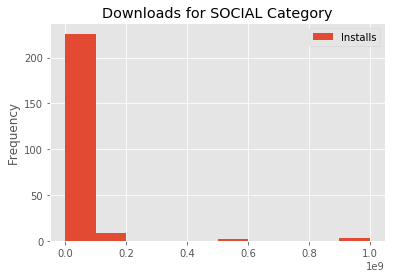

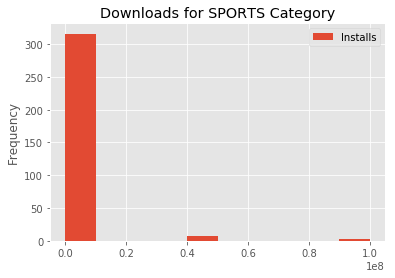

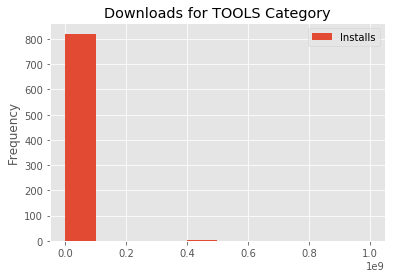

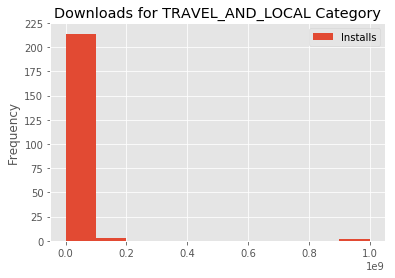

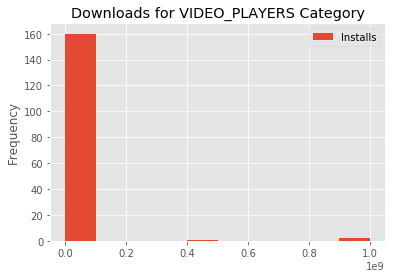

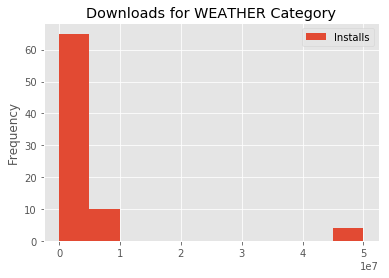

In [76]:
tempdf = df[['Category','Installs']]
new_df = tempdf.groupby(['Category'])

axes = new_df.plot(kind='hist')
for i, (groupname, group) in enumerate(new_df):
    axes[i].set_title("Downloads for "+ groupname + " Category")


#### Relation between downloads and ratings

In [77]:
temp_df = df

In [78]:
data = [{
    #'x': type_groups.get_group(t)['Rating'], 
    'x' : temp_df['Installs'].dropna(),
    'type':'scatter',
    'y' : temp_df['Rating'].dropna(),
    #'name' : t,
    'mode' : 'markers',
    #'showlegend': True,
    'text' : df['Size'],
    } for t in set(temp_df.Type)]


layout = {'title':"Installs vs Rating", 
          'xaxis': {'title' : 'Installs'},
          'yaxis' : {'title' : 'Rating'},
         'plot_bgcolor': 'rgb(0,0,0)'}

plotly.offline.iplot({'data': data, 'layout': layout})


#### Relation between downloads and number of reviews

In [79]:
data = [{
    #'x': type_groups.get_group(t)['Rating'], 
    'x' : np.log10(df['Installs'].apply(lambda x : int(x))),
    'type':'scatter',
    'y' : np.log10(df['Reviews'].apply(lambda x : int(x))),
    #'name' : t,
    'mode' : 'markers',
    #'showlegend': True,
    'text' : df['Size'],
    } for t in set(temp_df.Type)]


layout = {'title':"Installs vs Reviews (log scaled)", 
          'xaxis': {'title' : 'Installs'},
          'yaxis' : {'title' : 'Reviews'},
         'plot_bgcolor': 'rgb(0,0,0)'}

plotly.offline.iplot({'data': data, 'layout': layout})


### Sentiment Analysis

In [80]:
reviews_df = pd.read_csv('..\ExploratoryDataAnalysis\google-play-store-apps\googleplaystore_user_reviews.csv')

In [81]:
concatdf = pd.merge(df, reviews_df, on = "App", how = "inner")
concatdf = concatdf.dropna(subset=['Translated_Review', 'Sentiment'])

In [82]:
concatdf.head(3)

App        Category  Rating  Reviews Size  Installs  Type  \
0  Coloring book moana  ART_AND_DESIGN     3.9      967   14    500000  Free   
1  Coloring book moana  ART_AND_DESIGN     3.9      967   14    500000  Free   
2  Coloring book moana  ART_AND_DESIGN     3.9      967   14    500000  Free   

   Price Content Rating                     Genres      Last Updated  \
0    0.0       Everyone  Art & Design;Pretend Play  January 15, 2018   
1    0.0       Everyone  Art & Design;Pretend Play  January 15, 2018   
2    0.0       Everyone  Art & Design;Pretend Play  January 15, 2018   

  Current Ver   Android Ver  \
0       2.0.0  4.0.3 and up   
1       2.0.0  4.0.3 and up   
2       2.0.0  4.0.3 and up   

                                   Translated_Review Sentiment  \
0  A kid's excessive ads. The types ads allowed a...  Negative   
1                                         It bad >:(  Negative   
2                                               like   Neutral   

   Sentiment_Polarity  Sentiment_Subjectivity  
0              -0.250                1.000000  
1              -0.725                0.833333  
2               0.000                0.000000

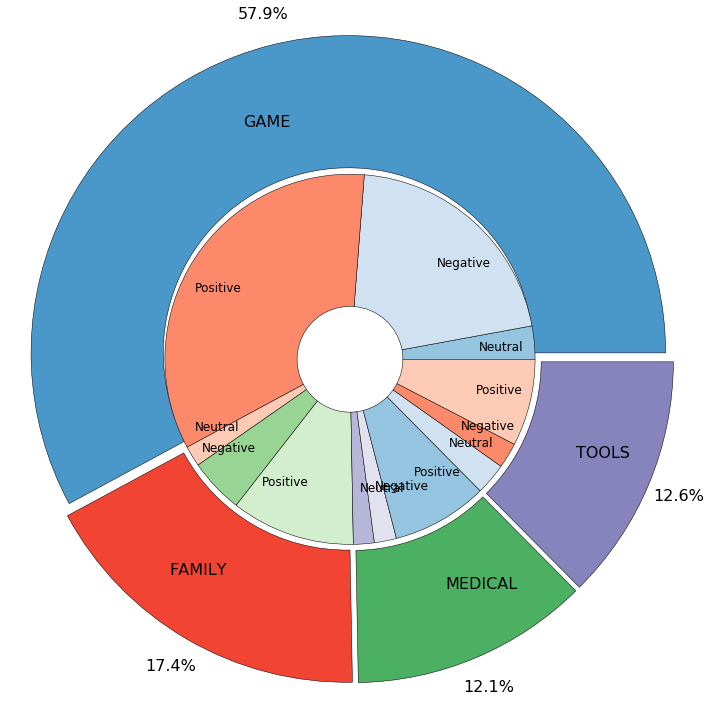

In [83]:
new_df = concatdf.groupby(['Category', 'Sentiment']).agg({'App' : 'count'}).reset_index()
outer_group_names = ['GAME', 'FAMILY', 'MEDICAL', 'TOOLS']
outer_group_values = [len(concatdf.App[concatdf.Category == category]) for category in outer_group_names]

a, b, c, d=[plt.cm.Blues, plt.cm.Reds, plt.cm.Greens, plt.cm.Purples]
inner_group_names = ['Neutral', 'Negative', 'Positive'] * 4
inner_group_values = []
for category in outer_group_names:
    for t in ['Neutral', 'Negative', 'Positive']:
        x = new_df[new_df.Category == category]
        try:
            #print(x.App[x.Type == t].values[0])
            inner_group_values.append(int(x.App[x.Sentiment == t].values[0]))
        except:
            #print(x.App[x.Type == t].values[0])
            inner_group_values.append(0)

explode = (0.025,0.025,0.025,0.025)
# First Ring (outside)
fig, ax = plt.subplots(figsize=(10,10))
ax.axis('equal')
mypie, texts, _ = ax.pie(outer_group_values, radius=1.2, labels=outer_group_names, autopct='%1.1f%%', pctdistance=1.1,
                                 labeldistance= 0.75,  explode = explode, colors=[a(0.6), b(0.6), c(0.6), d(0.6)], textprops={'fontsize': 16})
plt.setp( mypie, width=0.5, edgecolor='black')
 
# Second Ring (Inside)
mypie2, _ = ax.pie(inner_group_values, radius=1.2-0.5, labels=inner_group_names, labeldistance= 0.7, 
                   textprops={'fontsize': 12}, colors = [a(0.4), a(0.2), b(0.4), b(0.2), c(0.4), c(0.2), d(0.4), d(0.2)])
plt.setp( mypie2, width=0.5, edgecolor='black')
plt.margins(0,0)
 
# show it
plt.tight_layout()
plt.show()




### One Way ANOVA Test - App Installs

In [84]:
a = stats.f_oneway(df.loc[df.Category == 'BUSINESS']['Installs'].dropna(), 
               df.loc[df.Category == 'FAMILY']['Installs'].dropna(),
               df.loc[df.Category == 'GAME']['Installs'].dropna(),
               df.loc[df.Category == 'PERSONALIZATION']['Installs'].dropna(),
               df.loc[df.Category == 'LIFESTYLE']['Installs'].dropna(),
               df.loc[df.Category == 'FINANCE']['Installs'].dropna(),
               df.loc[df.Category == 'EDUCATION']['Installs'].dropna(),
               df.loc[df.Category == 'MEDICAL']['Installs'].dropna(),
               df.loc[df.Category == 'TOOLS']['Installs'].dropna(),
               df.loc[df.Category == 'PRODUCTIVITY']['Installs'].dropna()
              )
print(a)
print('\nThe p-value is extremely small, hence we reject the null hypothesis in favor of the alternate hypothesis.\n')

F_onewayResult(statistic=15.905248910858063, pvalue=4.9361986562612176e-26)

The p-value is extremely small, hence we reject the null hypothesis in favor of the alternate hypothesis.



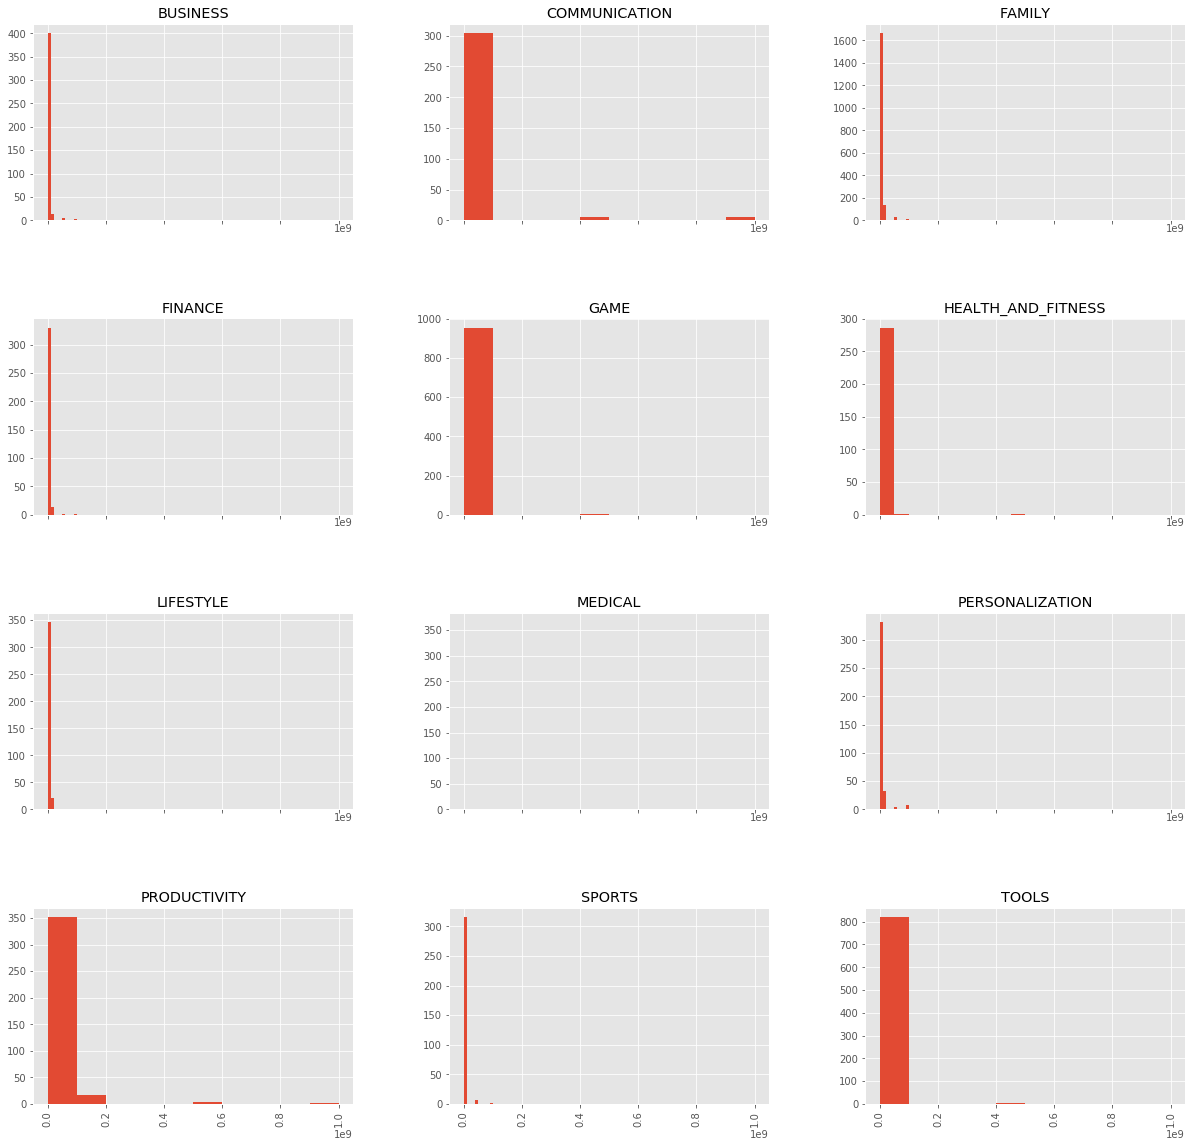

In [85]:
groupeddf = df.groupby('Category').filter(lambda x: len(x) > 286).reset_index()
arr = groupeddf['Installs'].hist(by=groupeddf['Category'], sharex=True, figsize=(20,20))

#### The average app installs across categories is significantly different.

### Best Performing Categories

In [86]:
groups = df.groupby('Category').filter(lambda x: len(x) >= 170).reset_index()
#print(type(groups.item.['BUSINESS']))
print('Average Installs = ', np.nanmean(list(groups.Installs)))
#print(len(groups.loc[df.Category == 'DATING']))
c = ['hsl('+str(h)+',50%'+',50%)' for h in np.linspace(0, 720, len(set(groups.Category)))]


#df_sorted = df.groupby('Category').agg({'Rating':'median'}).reset_index().sort_values(by='Rating', ascending=False)
#print(df_sorted)

layout = {'title' : 'App Installs across major categories',
        'xaxis': {'tickangle':-40},
        'yaxis': {'title': 'Installs'},
          'plot_bgcolor': 'rgb(250,250,250)',
          'shapes': [{
              'type' :'line',
              'x0': -.5,
              'y0': np.nanmean(list(groups.Installs)),
              'x1': 19,
              'y1': np.nanmean(list(groups.Installs)),
              'line': { 'dash': 'dashdot'}
          }]
          }

data = [{
    'y': df.loc[df.Category==category]['Installs'], 
    'type':'violin',
    'name' : category,
    'showlegend':False,
    #'marker': {'color': 'Set2'},
    } for i,category in enumerate(list(set(groups.Category)))]



plotly.offline.iplot({'data': data, 'layout': layout})

Average Installs =  7989527.218946868


In [87]:
print('Many categories perform well with 50% of the apps with more than 4.5M downloads')

Many categories perform well with 50% of the apps with more than 4.5M downloads
